In [4]:
import time
from astropy.coordinates import EarthLocation,SkyCoord
from astropy.time import Time, TimeDelta
from astropy import units as u
from astropy.coordinates import AltAz
import numpy as np
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore', category=UserWarning, message=".*NonRotationTransformationWarning.*")

In [5]:
print(time.time())

1736347350.862173


In [6]:
import datetime

In [9]:
time

'2025-01-08 15:44:28.317902'

In [117]:
address = "Jagtvej 155A, 2200 København, Denmark"

# Get the EarthLocation object for the address
location = EarthLocation.of_address(address)

In [118]:
location

<EarthLocation (3516210.50905282, 783149.00313061, 5245771.1198364) m>

In [119]:
location

<EarthLocation (3516210.50905282, 783149.00313061, 5245771.1198364) m>

In [2]:
# Address of interest
address = "Jagtvej 155A, 2200 København, Denmark"

# Get EarthLocation object for the address
location = EarthLocation.of_address(address)

# Copenhagen time zone
# copenhagen_tz = pytz.timezone('Europe/Copenhagen')

# Get the current UTC time from Astropy
utc_time = Time.now()

# Convert the UTC time to a datetime object
utc_datetime = utc_time.to_datetime()
print(utc_datetime)
# Convert UTC time to Copenhagen local time
# copenhagen_time = utc_datetime.astimezone(copenhagen_tz)


2025-01-08 14:34:55.520366


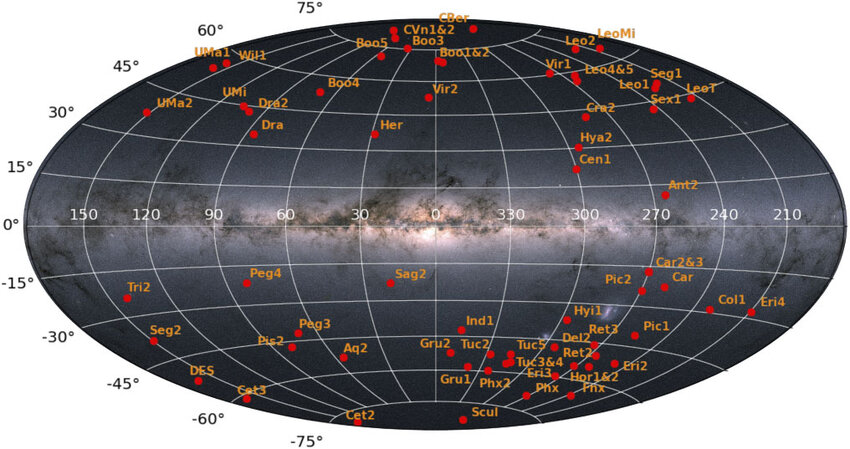

In [124]:

def Set_pointing(a,b):
    pass

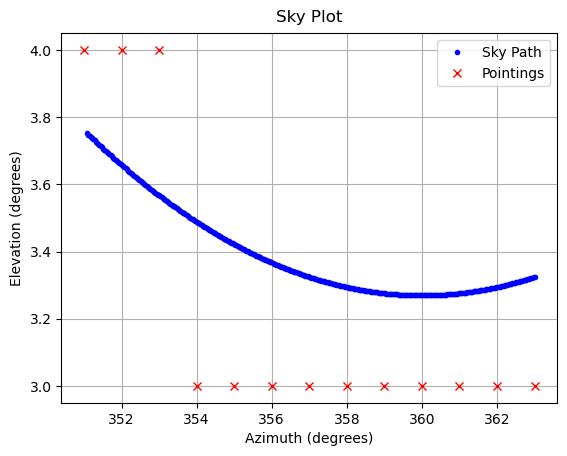

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, SkyCoord, AltAz
from astropy.time import Time, TimeDelta
from astropy import units as u

# Constants
L, B = 170, 0
OBSERVING_LOCATION = EarthLocation(lat="55.701227", lon="12.556680", height=100 * u.m)
START_TIME_STR = "2024-12-17 10:00:00"
START_TIME = Time(START_TIME_STR)
OBSERVING_DURATION_SECONDS = 3600  # 1 hour
TIME_STEP = 10  # Track position every 10 seconds
pressure = 0.1005 * u.megapascal
temperature = 7 * u.Celsius
relative_humidity = 0.93
obswl = 21.106 * u.cm
def boundary_adjustments(values):
    """Adjust azimuth values for wrapping across 0-360 degrees."""
    offset = 0
    adjusted = [values[0]]
    for i in range(1, len(values)):
        diff = values[i] - values[i - 1]
        if diff > 300:
            offset -= 360
        elif diff < -300:
            offset += 360
        adjusted.append(values[i] + offset)
    return adjusted

def calculate_sky_path(duration, time_step):
    """Calculate azimuth, elevation, and time for the observation period."""
    azimuths, elevations, times = [], [], []
    for i in range(0, duration, time_step):
        current_time = START_TIME + TimeDelta(i, format='sec')
        galactic_coord = SkyCoord(l=L * u.deg, b=B * u.deg, frame='galactic')
        equatorial_coord = galactic_coord.icrs
        altaz_frame = AltAz(obstime=current_time, location=OBSERVING_LOCATION,pressure=pressure, temperature=temperature, relative_humidity=relative_humidity,obswl=obswl)
        horizontal_coord = equatorial_coord.transform_to(altaz_frame)
        azimuths.append(horizontal_coord.az.degree)
        elevations.append(horizontal_coord.alt.degree)
        times.append(current_time.iso)
    return azimuths, elevations, times

def calculate_turning_points(azimuths, elevations):
    """Identify pointing adjustments and record their locations."""
    turning_points = []
    pointing = [0, 0]
    turn_flags = []
    for az, el in zip(azimuths, elevations):
        if pointing == [0, 0] or SkyCoord(
            az=pointing[0] * u.deg, alt=pointing[1] * u.deg, frame='altaz'
        ).separation(SkyCoord(az=az * u.deg, alt=el * u.deg, frame='altaz')) >= 1 * u.deg:
            pointing = [round(az), round(el)]
            turning_points.append(pointing)
            turn_flags.append(True)
            Set_pointing(round(az), round(el))
        else:
            turn_flags.append(False)
    return turning_points, turn_flags

def plot_sky_path(azimuths, elevations, turning_points):
    """Generate a plot of the sky path and turning points."""
    fig, ax = plt.subplots()
    adjusted_azimuths = boundary_adjustments(azimuths)
    turned_az = boundary_adjustments([p[0] for p in turning_points])
    turned_el = [p[1] for p in turning_points]
    
    ax.plot(adjusted_azimuths, elevations, '.', color='blue', label='Sky Path')
    ax.plot(turned_az, turned_el, 'x', color='red', label='Pointings')
    ax.set_title("Sky Plot", va='bottom')
    ax.set_xlabel("Azimuth (degrees)")
    ax.set_ylabel("Elevation (degrees)")
    ax.grid(True)
    ax.legend()
    plt.show()

# Main Execution
azimuths, elevations, times = calculate_sky_path(OBSERVING_DURATION_SECONDS, TIME_STEP)
turning_points, _ = calculate_turning_points(azimuths, elevations)
plot_sky_path(azimuths, elevations, turning_points)


In [105]:
print(len(elevations), len(azimuths))

360 359


In [347]:
A=np.linspace(0,360,1000)

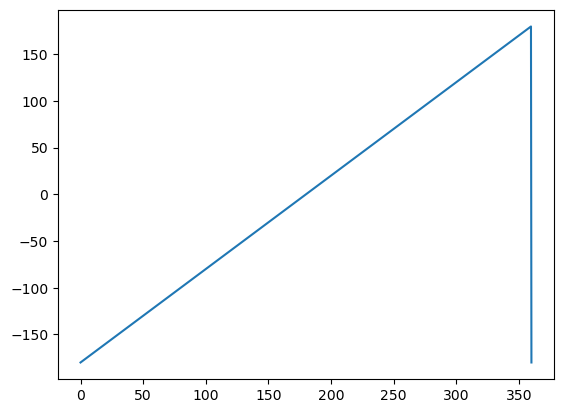

In [361]:
plt.plot(A,normalize_azimuth(A))

In [364]:
def normalize_azimuth(azimuth):
    normalized_azimuth = (azimuth + 180) % 360 - 180
    return normalized_azimuth

# Example usage
azimuth = 0
normalized = normalize_azimuth(azimuth)
print(f"Azimuth: {azimuth}° -> Normalized Azimuth: {normalized}°")

Azimuth: 0° -> Normalized Azimuth: 0°


In [303]:
round(Turned_location[0][0]),round(Turned_location[0][1])

(191, 5)

In [10]:
a=4

print(f'azimuth: {a}')

azimuth: 4


In [137]:
np.scs(19)

AttributeError: module 'numpy' has no attribute 'scs'

In [4]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time

import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f227cdf8710>

In [134]:
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time
import astropy.units as u

# Observer's location
location = EarthLocation(lat=52.0*u.deg, lon=5.0*u.deg, height=100*u.m)

# Time of observation
observation_time = Time.now()

# Altitude and azimuth of the object (example: 45° altitude and arbitrary azimuth)
altitude = 45 * u.deg
azimuth = 180 * u.deg  # South direction, for example

# Create an AltAz frame for the observer's location and time
altaz_frame = AltAz(location=location, obstime=observation_time, pressure=pressure, temperature=temperature, relative_humidity=relative_humidity,obswl=obswl)
# Construct the AltAz coordinate for the target
target_altaz = SkyCoord(alt=altitude, az=azimuth, frame=altaz_frame)

# Calculate air mass
air_mass = target_altaz.secz  # Secant of zenith angle, approximately equal to air mass

print(f"Air mass: {air_mass}")

Air mass: 1.4142135623730951


In [135]:
target_altaz.secz

<Quantity 1.41421356>

In [139]:
1/np.cos(np.deg2rad(45))

1.414213562373095